In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import random

In [4]:
dfdata = pd.read_csv('Brand_mobil_20102017.csv', parse_dates = ['Periode'], index_col = 'Periode')

In [5]:
# df_total=dfdata.copy()

In [6]:
dfdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0,52831.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0,55688.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0,65555.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0,65232.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0,60520.0


In [7]:
dfdata.isna().tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,False,False,False,False,False,False,False
2017-10-01,False,False,False,False,False,False,False
2017-11-01,False,False,False,False,False,False,False
2017-12-01,False,False,False,False,False,False,False
NaT,True,True,True,True,True,True,True


In [8]:
dfdata.dropna(inplace = True)
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-08-01,34809.0,15821.0,17690.0,9185.0,10035.0,9716.0,97256.0
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0


In [9]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 7 columns):
Toyota        96 non-null float64
Daihatsu      96 non-null float64
Honda         96 non-null float64
Mitsubishi    96 non-null float64
Suzuki        96 non-null float64
Others        96 non-null float64
Total         96 non-null float64
dtypes: float64(7)
memory usage: 6.0 KB


In [10]:
print('The data Time range from {} to {}'.format(dfdata.index.min(),dfdata.index.max()))

The data Time range from 2010-01-01 00:00:00 to 2017-12-01 00:00:00


## Data Preprocessing

In [11]:
tdata = dfdata[['Toyota','Daihatsu','Honda','Mitsubishi','Suzuki','Others']].resample('MS').mean()
tdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others
Periode,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0


In [12]:
#visual
td = dfdata['Toyota'].resample('MS').mean()

## Data Visualization and Analysis

C:\Users\GILANG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


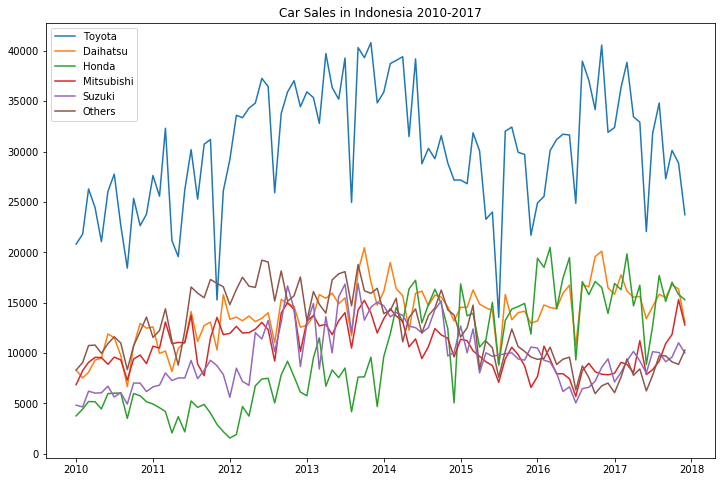

In [13]:
plt.figure(figsize = (12,8))
plt.title('Car Sales in Indonesia 2010-2017')

plt.plot(tdata['Toyota'], label = 'Toyota')
plt.plot(tdata['Daihatsu'], label = 'Daihatsu')
plt.plot(tdata['Honda'], label = 'Honda')
plt.plot(tdata['Mitsubishi'], label = 'Mitsubishi')
plt.plot(tdata['Suzuki'], label = 'Suzuki')
plt.plot(tdata['Others'], label = 'Others')
plt.legend()
plt.show()

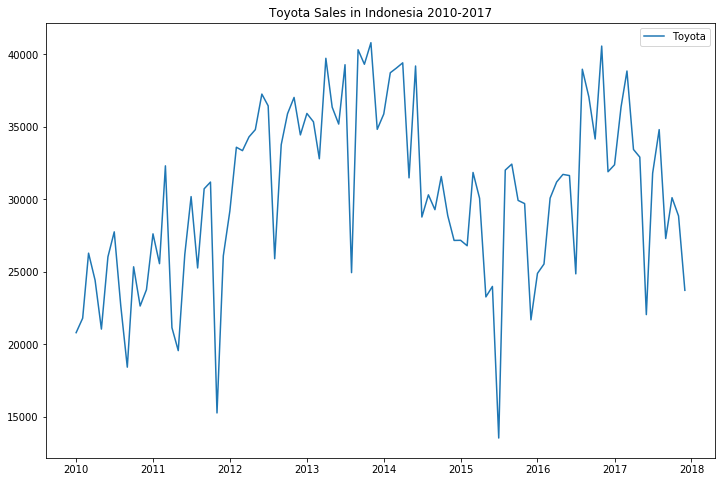

In [14]:
plt.figure(figsize = (12,8))
plt.title('Toyota Sales in Indonesia 2010-2017')
plt.plot(tdata['Toyota'], label = 'Toyota')
plt.legend()
plt.show()

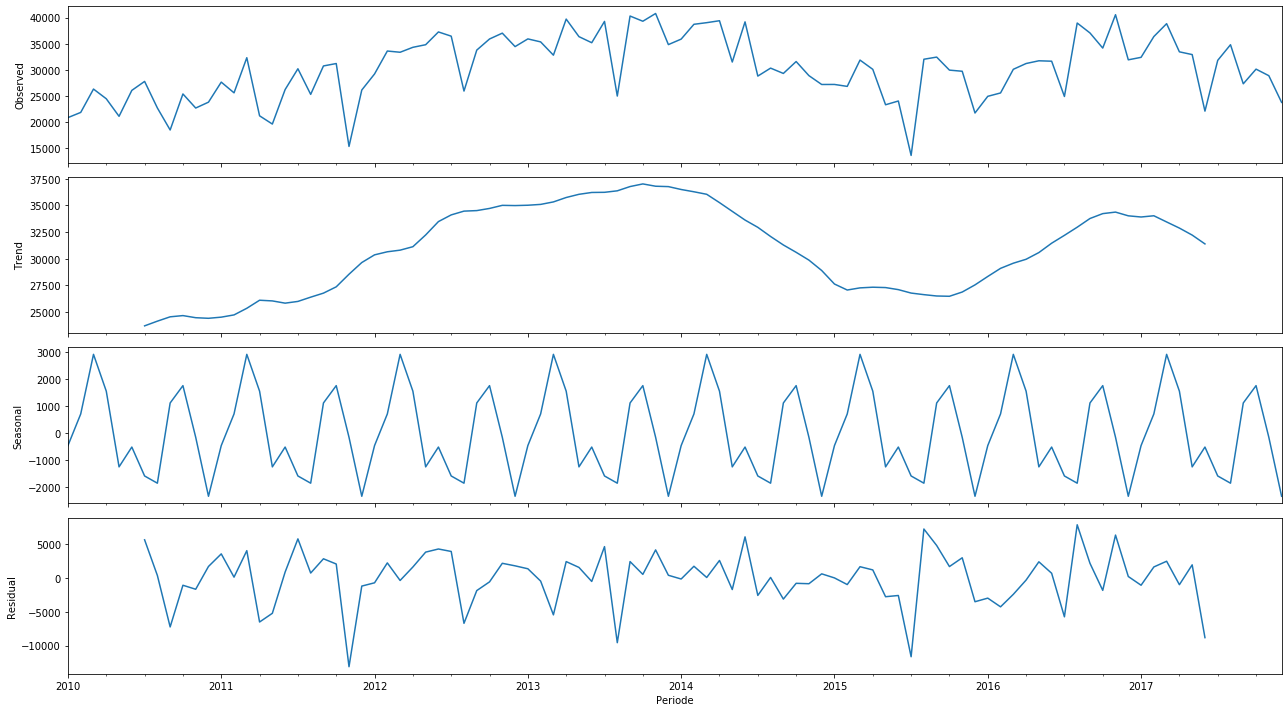

In [15]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(td, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
decomposition.seasonal.head(10)

Periode
2010-01-01    -453.058036
2010-02-01     719.941964
2010-03-01    2930.061012
2010-04-01    1564.436012
2010-05-01   -1242.921131
2010-06-01    -507.492560
2010-07-01   -1580.379464
2010-08-01   -1848.069940
2010-09-01    1126.519345
2010-10-01    1769.763393
Freq: MS, Name: Toyota, dtype: float64

In [17]:
decomposition.resid.head(10)

Periode
2010-01-01            NaN
2010-02-01            NaN
2010-03-01            NaN
2010-04-01            NaN
2010-05-01            NaN
2010-06-01            NaN
2010-07-01    5637.587798
2010-08-01     362.444940
2010-09-01   -7251.936012
2010-10-01   -1085.680060
Freq: MS, Name: Toyota, dtype: float64

Made per DataFrame

In [18]:
dftoyota = dfdata['Toyota']
dftoyota.head()

dfdaihatsu = dfdata['Daihatsu']
dfdaihatsu.head()

dfhonda = dfdata['Honda']
dfhonda.head()

dfmitsubishi = dfdata['Mitsubishi']
dfmitsubishi.head()

dfsuzuki = dfdata['Suzuki']
dfsuzuki.head()

dfothers = dfdata['Others']
dfothers.head()

dftoyota.head()
dfdaihatsu.head()
dfhonda.head()
dfmitsubishi.head()
dfsuzuki.head()
dfothers.head()

Periode
2010-01-01     8301.0
2010-02-01     9055.0
2010-03-01    10734.0
2010-04-01    10785.0
2010-05-01     9959.0
Name: Others, dtype: float64

Dickey-Fuller Test #uji statisioner

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
dfcar_brand = [dftoyota,dfdaihatsu,dfhonda,dfmitsubishi,dfsuzuki,dfothers]
dfname = ['Toyota :', 'Daihatsu :','Honda :','Mitsubishi :', 'Suzuki :','Others :']

In [21]:
for index, i in enumerate(dfcar_brand):
    result = adfuller(i)
    print(dfname[index])
    print('ADF Statistic:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    
    #all data non statisioner, need diferensiation ( data > o,o5 )

Toyota :
ADF Statistic:-2.7038963342563753
p-value: 0.07336645650211786
Daihatsu :
ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553
Honda :
ADF Statistic:-0.7472288279341994
p-value: 0.8341341321905049
Mitsubishi :
ADF Statistic:-1.799449654505583
p-value: 0.3807349590833119
Suzuki :
ADF Statistic:-1.9043213510014503
p-value: 0.3300309496726761
Others :
ADF Statistic:-1.1290154724704395
p-value: 0.7033632852005766


## Differencing

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

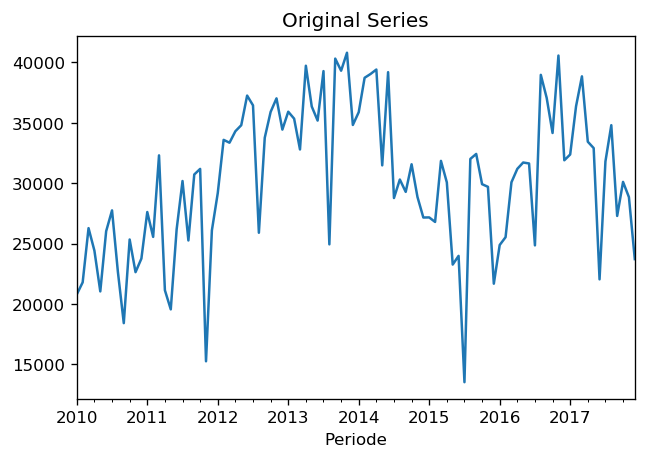

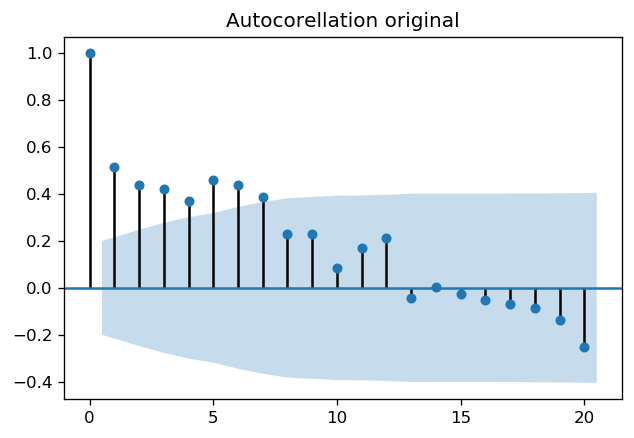

In [23]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
ori = dftoyota.plot()
ori.set_title('Original Series')
plot_acf(dftoyota, title = 'Autocorellation original')

plt.show()

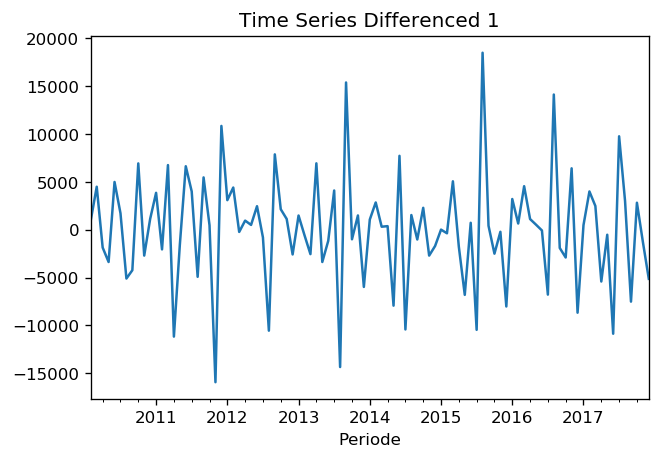

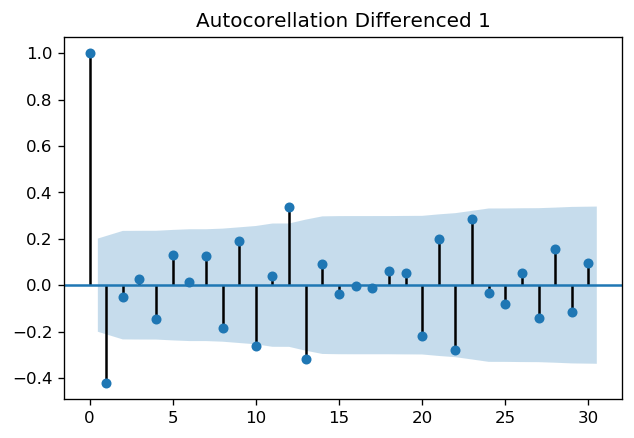

ADF Statistic:-1.8708054639249332
p-value: 0.34591727856781324


In [24]:
# Differencing Toyota 1
diff1 = dftoyota.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_acf(dftoyota.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 1')
plt.show()


result = adfuller(dftoyota.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

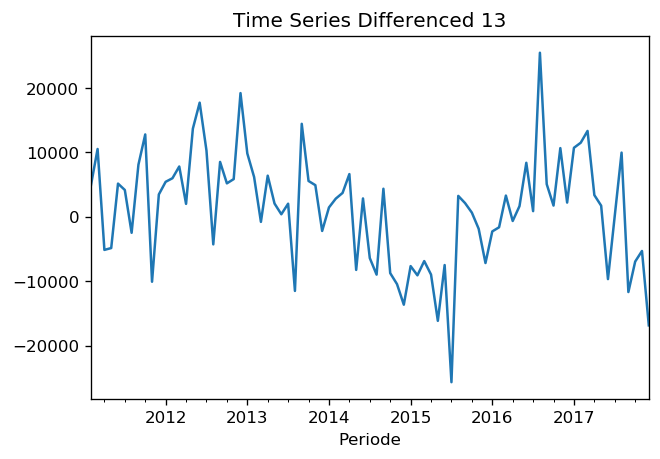

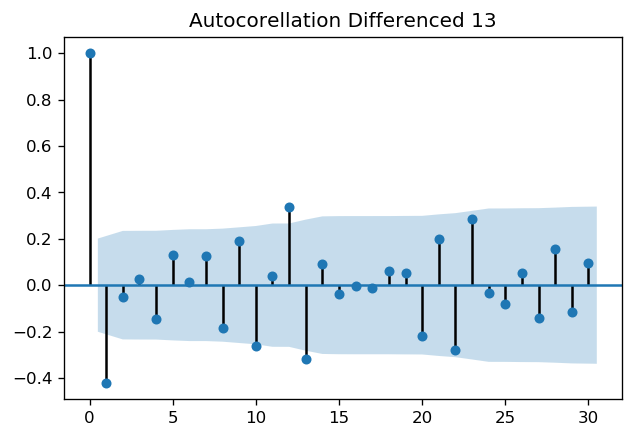

ADF Statistic:-3.466886610039424
p-value: 0.008879372491684598


In [25]:
# Differencing Toyota 13
diff13 = dftoyota.diff(13).dropna().plot()
diff13.set_title('Time Series Differenced 13')
plot_acf(dftoyota.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 13')
plt.show()

result = adfuller(dftoyota.diff(13).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

In [26]:
result = adfuller(dftoyota.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif toyota 1
result = adfuller(dftoyota.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif toyota 13
result = adfuller(dftoyota.diff(13).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))


ADF Statistic:-2.7038963342563753
p-value: 0.07336645650211786


ADF Statistic:-1.8708054639249332
p-value: 0.34591727856781324


ADF Statistic:-3.466886610039424
p-value: 0.008879372491684598


Data yang akan di gunakan ada lah ada awal, karena setelah di dif-1 semakin tinggi p-value,
dan di temukan p-value dibawah 0.05 pada Diff-13 p-value rendah tatapi semakin banyak nilai Nan 

In [27]:
t_difference_0 = dftoyota.dropna()

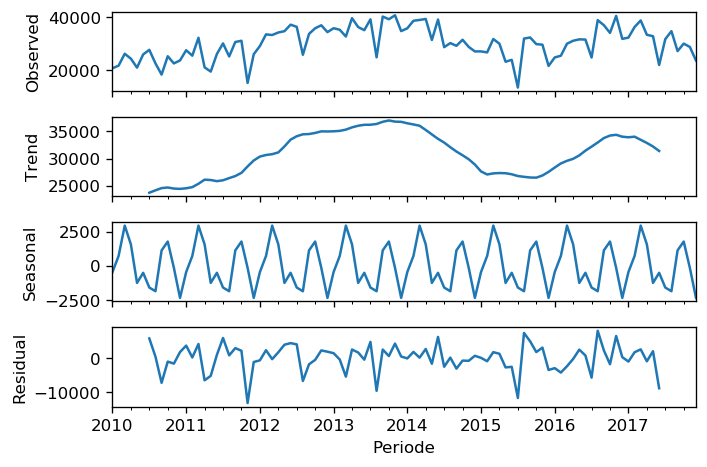

In [28]:
#yang akan digunakanadalah model Additive karena plot terlihat seperti mengikuti addition model
t_decomposition_difference_0 = sm.tsa.seasonal_decompose(t_difference_0, model='additive') 
fig = t_decomposition_difference_0.plot()
plt.show()

In [29]:
t_deseason = t_difference_0 - t_decomposition_difference_0.seasonal

In [30]:
t_decomposition_difference_0.seasonal.tail()

Periode
2017-08-01   -1848.069940
2017-09-01    1126.519345
2017-10-01    1769.763393
2017-11-01    -145.385417
2017-12-01   -2333.415179
Name: Toyota, dtype: float64

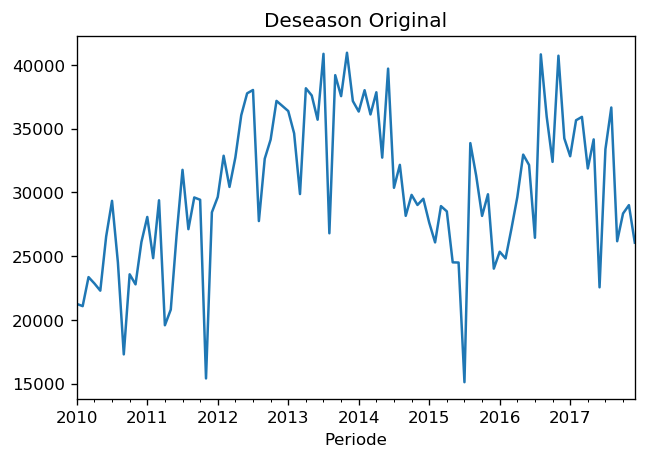

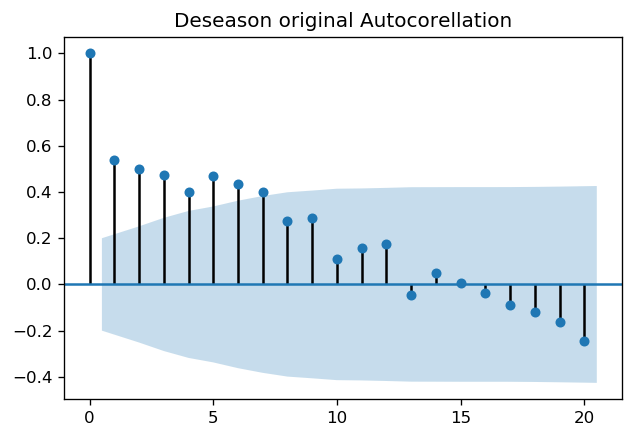

In [31]:
#Deseason original
t_ori_deseason = t_deseason.plot()
t_ori_deseason.set_title('Deseason Original')
plot_acf(t_deseason, title = 'Deseason original Autocorellation')

plt.show()

In [32]:
result = adfuller(t_deseason)
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-2.759811682716635
p-value: 0.06424764138527005


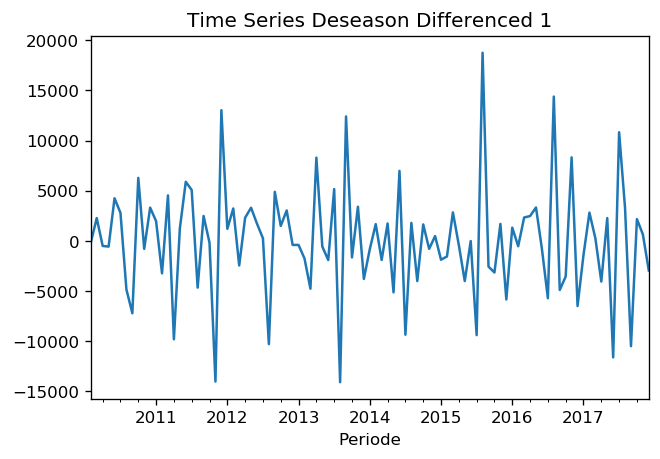

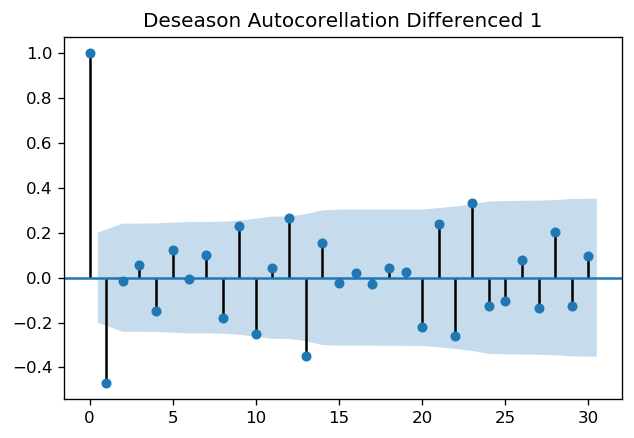

ADF Statistic:-1.8101496780668387
p-value: 0.3754344303279394


In [33]:
# 1st Differencing
diff1_deseason = t_deseason.diff().dropna().plot()
diff1_deseason.set_title('Time Series Deseason Differenced 1')
plot_acf(t_deseason.diff().dropna(),lags = 30, title = 'Deseason Autocorellation Differenced 1')

plt.show()

result = adfuller(t_deseason.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

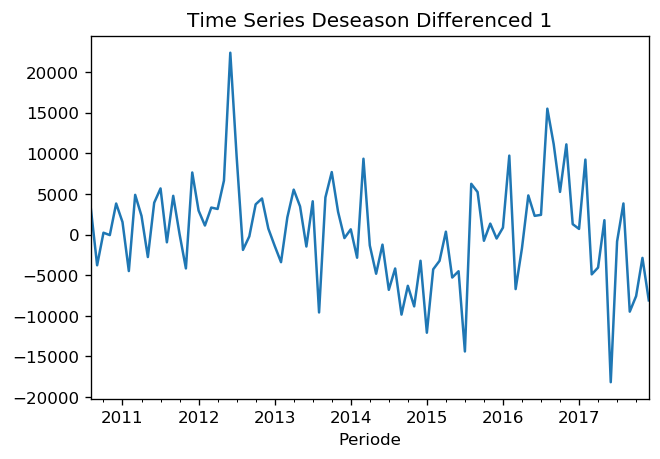

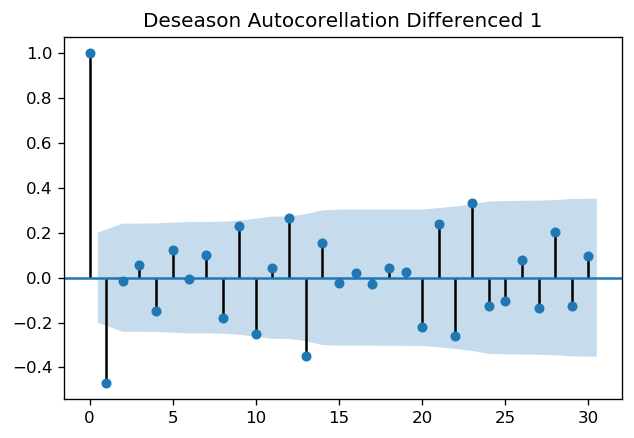

ADF Statistic:-2.874353116209796
p-value: 0.04841269930902822


In [40]:
# 2t Differencing
diff1_deseason = t_deseason.diff(7).dropna().plot()
diff1_deseason.set_title('Time Series Deseason Differenced 1')
plot_acf(t_deseason.diff().dropna(),lags = 30, title = 'Deseason Autocorellation Differenced 1')

plt.show()

result = adfuller(t_deseason.diff(7).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

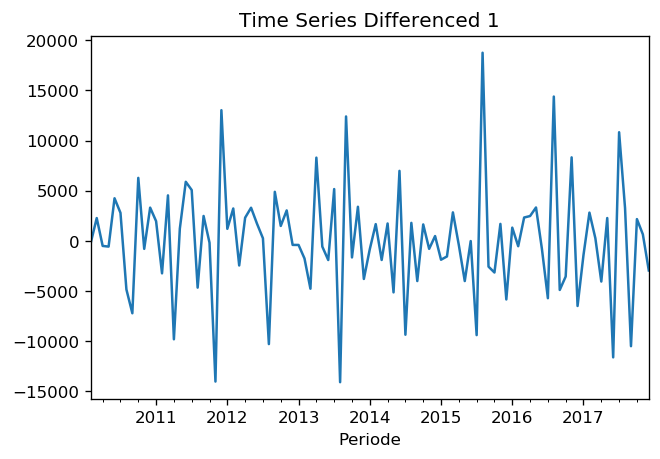

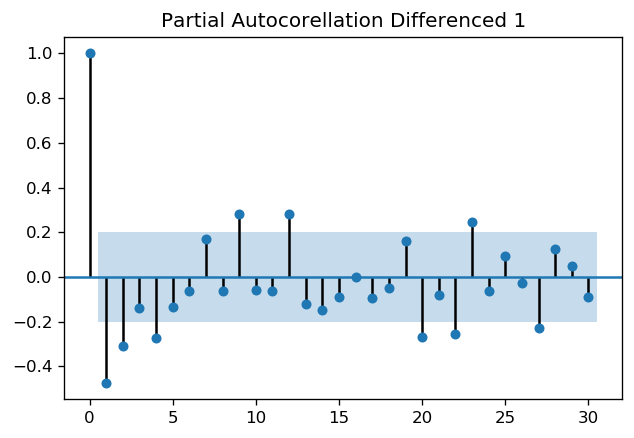

ADF Statistic:-1.8101496780668387
p-value: 0.3754344303279394


In [41]:
#PACF
diff1 = t_deseason.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_pacf(t_deseason.diff().dropna(), lags = 30, title = 'Partial Autocorellation Differenced 1')

plt.show()

result = adfuller(t_deseason.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

q =1

## ARIMA

In [42]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(t_deseason,order =(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Toyota   No. Observations:                   95
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -935.602
Method:                       css-mle   S.D. of innovations           4564.873
Date:                Wed, 20 Nov 2019   AIC                           1877.204
Time:                        12:11:35   BIC                           1884.866
Sample:                    02-01-2010   HQIC                          1880.300
                         - 12-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             68.2071    150.190      0.454      0.651    -226.161     362.575
ma.L1.D.Toyota    -0.6869      0.068    -10.041      0.000      -0.821      -0.553
                                    

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


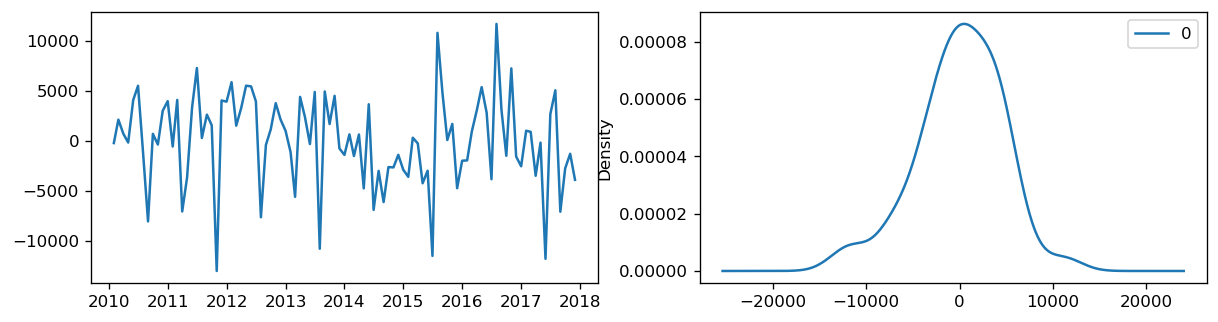

In [43]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
ax[0].plot(residuals.index, residuals.values)
residuals.plot.kde( ax=ax[1])


plt.show()

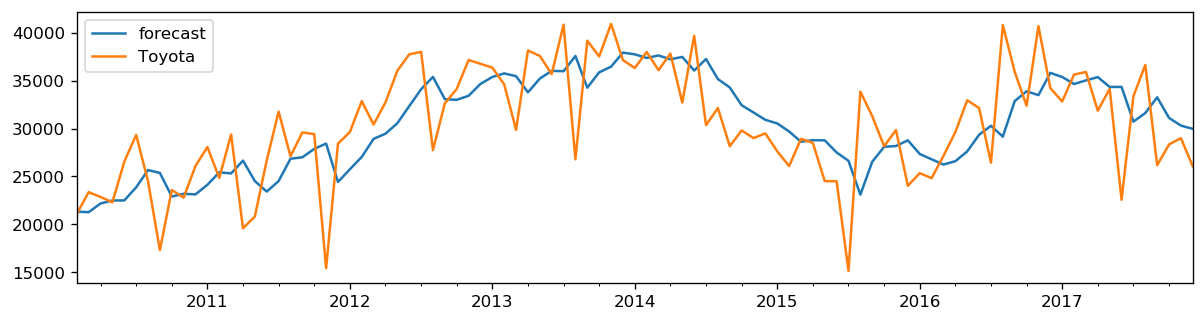

In [48]:
model_fit.plot_predict(dynamic=False)
plt.show()

Out-of-Time Cross Validation.

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


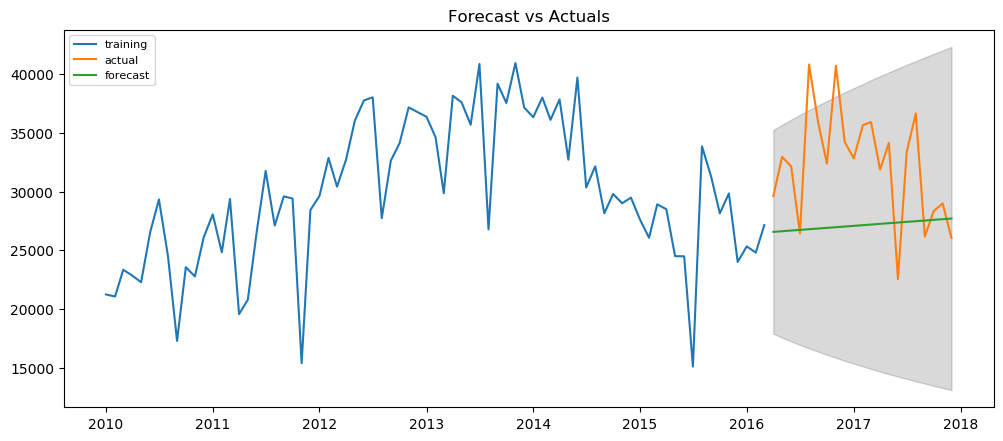

In [49]:
train = t_deseason[:75]
test = t_deseason[75:]
n_periods = 24

model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast (resulted in forecast, standard error, and confidence interval)
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [50]:
#Auto pd.arima
import pmdarima as pm

model = pm.auto_arima(t_deseason, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series (1 as monthly)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=1879.141, BIC=1889.357, Fit time=0.277 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1913.338, BIC=1918.446, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1891.914, BIC=1899.575, Fit time=0.101 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1877.204, BIC=1884.866, Fit time=0.124 seconds
Fit ARIMA: order=(0, 1, 2); AIC=1879.133, BIC=1889.348, Fit time=0.221 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.795 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   95
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -935.602
Method:                       css-mle   S.D. of innovations           4564.873
Date:                Wed, 20 Nov 2019   AIC                           1877.204
Time:                        12:13:33   BIC                           1884.866
Sample:                           

In [51]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  
    return({'mape':mape,'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 0.172409445541695,
 'corr': -0.34385698752441884,
 'minmax': 0.1703048340959441}

## SARIMA (Seasonal ARIMA)

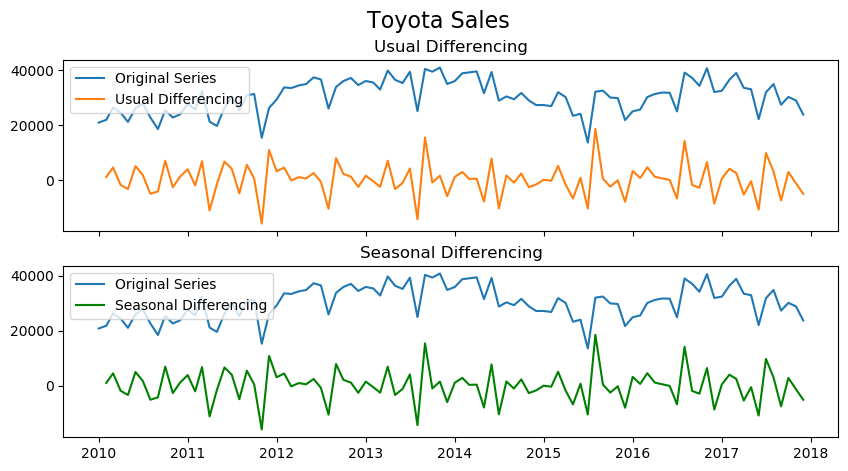

In [52]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dftoyota, label='Original Series')
axes[0].plot(dftoyota.diff(), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(dftoyota, label='Original Series')
axes[1].plot(dftoyota.diff(), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Toyota Sales', fontsize=16)
plt.show()

In [53]:
import pmdarima as pm
model = pm.auto_arima(dftoyota, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # with Seasonality
                      start_P=0, 
                      start_Q = 0, 
                      D=1,            #Determine the Seasonal Difference as 1
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1703.194, BIC=1708.032, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1682.710, BIC=1692.386, Fit time=0.215 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1674.005, BIC=1683.681, Fit time=0.239 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1674.472, BIC=1686.567, Fit time=0.738 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1686.957, BIC=1694.214, Fit time=0.035 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1675.089, BIC=1687.183, Fit time=0.748 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1677.060, BIC=1691.573, Fit time=0.767 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1675.755, BIC=1687.849, Fit time=0.225 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1697.977, BIC=1705.233, Fit time=0.270 seconds
Fit ARIMA: order=(0, 1, 2) s

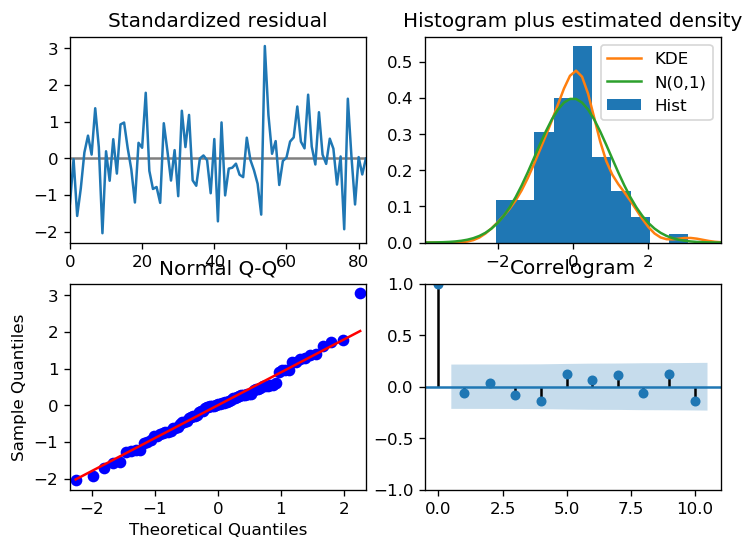

In [54]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

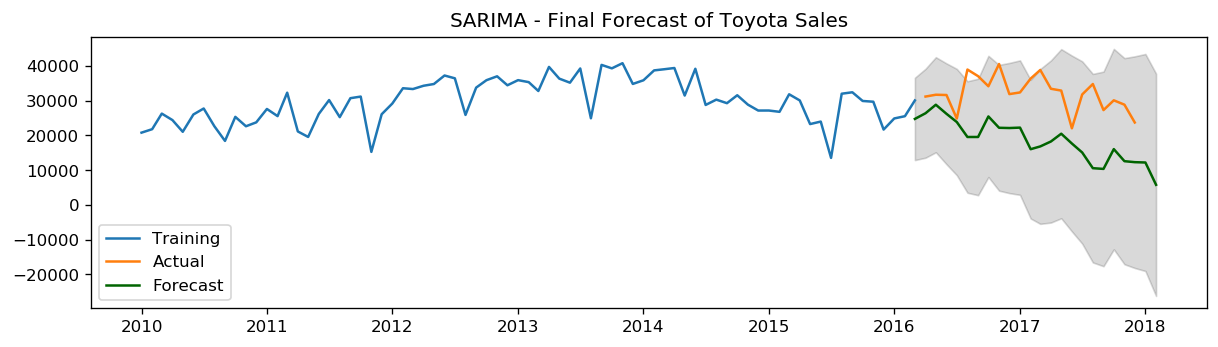

In [55]:
n_periods = 24
train = dftoyota[:75]
test = dftoyota[75:]

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train, label ='Training')
plt.plot(test, label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Toyota Sales")
plt.show()

validasi

In [ ]:
forecast_accuracy(fc, test)

# SARIMAX
karena data = 0.0 (seasonal)

In [66]:
result_mul = sm.tsa.seasonal_decompose(dftoyota[-24:],   # 24 last months
                                model='aditive', 
                                extrapolate_trend='freq')

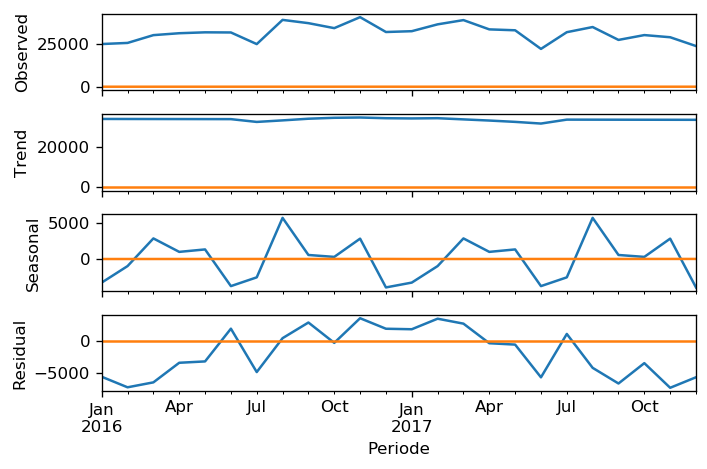

In [67]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
fig = result_mul.plot()
plt.show()

In [70]:
seasonal_index = result_mul.seasonal[-12:]
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

C:\Users\GILANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
dftoyota = pd.DataFrame(dftoyota)
dftoyota['month'] = dftoyota.index.month
dfT = pd.merge(dftoyota, seasonal_index, how='left', on='month')
dfT.columns = ['Toyota_sales_value_average', 'month', 'seasonal_index']
dfT.index = dftoyota.index  # reassign the index.

In [72]:
dfT.head()

,Toyota_sales_value_average,month,seasonal_index
Periode,,,
2010-01-01,20803.0,1,-3251.175979
2010-02-01,21800.0,2,-979.775410
2010-03-01,26287.0,3,2829.312658
2010-04-01,24422.0,4,976.963226
2010-05-01,21050.0,5,1313.697128


In [73]:

smaxmodel = pm.auto_arima(dfT[['Toyota_sales_value_average']], exogenous=dfT[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

smaxmodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1694.463, BIC=1709.048, Fit time=1.233 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1739.264, BIC=1746.557, Fit time=0.015 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1706.124, BIC=1718.278, Fit time=0.280 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1724.038, BIC=1736.192, Fit time=0.353 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1696.176, BIC=1713.192, Fit time=1.237 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1701.773, BIC=1713.927, Fit time=0.138 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=1697.064, BIC=1714.080, Fit time=1.402 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1698.254, BIC=1717.701, Fit time=3.440 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1696.984, BIC=1714.000, Fit time=0.501 seconds
Fit ARIMA: order=(1, 0, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -841.232
Date:                            Wed, 20 Nov 2019   AIC                           1694.463
Time:                                    12:20:34   BIC                           1709.048
Sample:                                         0   HQIC                          1700.327
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -42.7368    174.388     -0.245      0.806    -384.531     299.058
x1            -0.6623      1.551     -0.427      0.669      -3.703       2.378
ar.L1          0.9448      0.040     23.483      0.000       0.866       1.024
ma.L1         -0.6276      0.126     -4.998      0.000      -0.874      -0.381
ma.S.L12      -0.5134      0.113     -4.549      0.000      -0.735      -0.292
sigma2      3.156e+07      0.001   6.29e+10      0.000    3.16e+07    3.16e+07
===================================================================================
Ljung-Box (Q):                       44.84   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.28   Prob(JB):                         0.69
Heteroskedasticity (H):               0.71   Skew:                             0.22
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  8e+26. Standard errors may be unstable.
"""

In [74]:
seasonal_index

,Toyota,month
Periode,,
2017-01-01,-3251.175979,1
2017-02-01,-979.775410,2
2017-03-01,2829.312658,3
2017-04-01,976.963226,4
2017-05-01,1313.697128,5
2017-06-01,-3735.006471,6
2017-07-01,-2529.340751,7
2017-08-01,5658.580650,8
2017-09-01,549.356218,9


SARIMAX done..
forcast next 24month

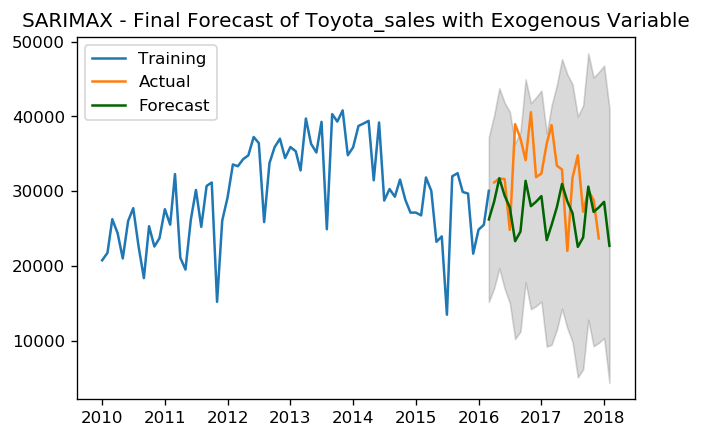

In [75]:
train = dfT[:75]
test = dfT[75:]
n_periods = 24

fitted, confint = smaxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index['Toyota'], 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train['Toyota_sales_value_average'], label ='Training')
plt.plot(test['Toyota_sales_value_average'], label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast of Toyota_sales with Exogenous Variable")
plt.show()

In [ ]:
# forecast_accuracy(fitted, test['Toyota_sales_value_average'])

## Prophet

In [76]:
test = dftoyota.copy()

In [77]:
test.head()

,Toyota,month
Periode,,
2010-01-01,20803.0,1
2010-02-01,21800.0,2
2010-03-01,26287.0,3
2010-04-01,24422.0,4
2010-05-01,21050.0,5


In [78]:
test.drop('month', axis = 1, inplace = True)

In [79]:
test.reset_index(inplace=True)

In [80]:
prediction_size = 7
train_df = test[:-prediction_size]

In [81]:
from fbprophet import Prophet 
m = Prophet()

In [82]:
train_df.columns = ['ds','y']
train_df.head()

,ds,y
0,2010-01-01,20803.0
1,2010-02-01,21800.0
2,2010-03-01,26287.0
3,2010-04-01,24422.0
4,2010-05-01,21050.0


In [83]:
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
future = m.make_future_dataframe(periods=prediction_size, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,24161.956288,17390.957733,29854.306327,24161.956288,24161.956288,-534.518379,-534.518379,-534.518379,-534.518379,-534.518379,-534.518379,0.0,0.0,0.0,23627.437909
1,2010-02-01,24362.487001,19329.043127,31061.586559,24362.487001,24362.487001,656.650028,656.650028,656.650028,656.650028,656.650028,656.650028,0.0,0.0,0.0,25019.137029
2,2010-03-01,24543.611515,22679.594505,35196.220071,24543.611515,24543.611515,4418.026900,4418.026900,4418.026900,4418.026900,4418.026900,4418.026900,0.0,0.0,0.0,28961.638415
3,2010-04-01,24744.142228,20230.186366,32067.861886,24744.142228,24744.142228,1651.165768,1651.165768,1651.165768,1651.165768,1651.165768,1651.165768,0.0,0.0,0.0,26395.307996
4,2010-05-01,24938.204208,17017.283943,28815.024132,24938.204208,24938.204208,-2159.356387,-2159.356387,-2159.356387,-2159.356387,-2159.356387,-2159.356387,0.0,0.0,0.0,22778.847821


In [85]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,24161.956288,17390.957733,29854.306327,24161.956288,24161.956288,-534.518379,-534.518379,-534.518379,-534.518379,-534.518379,-534.518379,0.0,0.0,0.0,23627.437909
1,2010-02-01,24362.487001,19329.043127,31061.586559,24362.487001,24362.487001,656.650028,656.650028,656.650028,656.650028,656.650028,656.650028,0.0,0.0,0.0,25019.137029
2,2010-03-01,24543.611515,22679.594505,35196.220071,24543.611515,24543.611515,4418.026900,4418.026900,4418.026900,4418.026900,4418.026900,4418.026900,0.0,0.0,0.0,28961.638415
3,2010-04-01,24744.142228,20230.186366,32067.861886,24744.142228,24744.142228,1651.165768,1651.165768,1651.165768,1651.165768,1651.165768,1651.165768,0.0,0.0,0.0,26395.307996
4,2010-05-01,24938.204208,17017.283943,28815.024132,24938.204208,24938.204208,-2159.356387,-2159.356387,-2159.356387,-2159.356387,-2159.356387,-2159.356387,0.0,0.0,0.0,22778.847821
5,2010-06-01,25138.734921,20551.921555,32726.966380,25138.734921,25138.734921,1297.124767,1297.124767,1297.124767,1297.124767,1297.124767,1297.124767,0.0,0.0,0.0,26435.859688
6,2010-07-01,25332.796901,18215.604960,29902.250668,25332.796901,25332.796901,-1512.246254,-1512.246254,-1512.246254,-1512.246254,-1512.246254,-1512.246254,0.0,0.0,0.0,23820.550647
7,2010-08-01,25533.327613,18847.391092,30986.462856,25533.327613,25533.327613,-730.659414,-730.659414,-730.659414,-730.659414,-730.659414,-730.659414,0.0,0.0,0.0,24802.668199
8,2010-09-01,25733.858326,21887.697216,34064.784085,25733.858326,25733.858326,1954.403316,1954.403316,1954.403316,1954.403316,1954.403316,1954.403316,0.0,0.0,0.0,27688.261642
9,2010-10-01,25927.920306,22261.205021,34816.927648,25927.920306,25927.920306,2840.729170,2840.729170,2840.729170,2840.729170,2840.729170,2840.729170,0.0,0.0,0.0,28768.649476


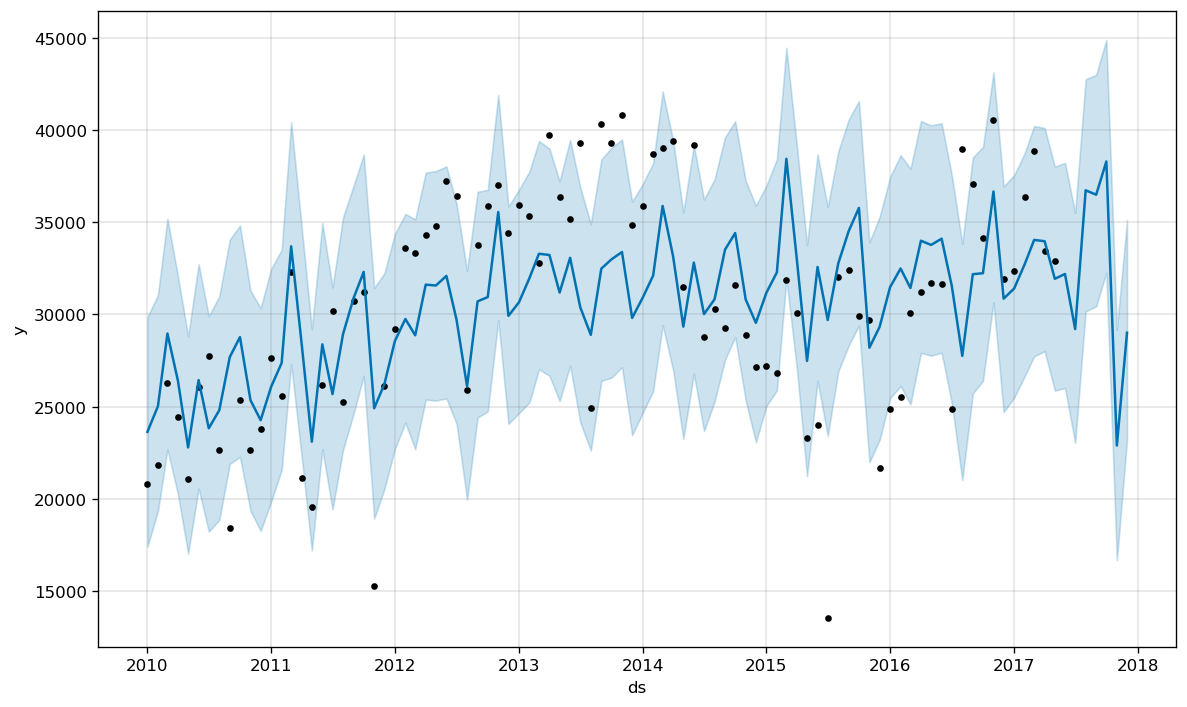

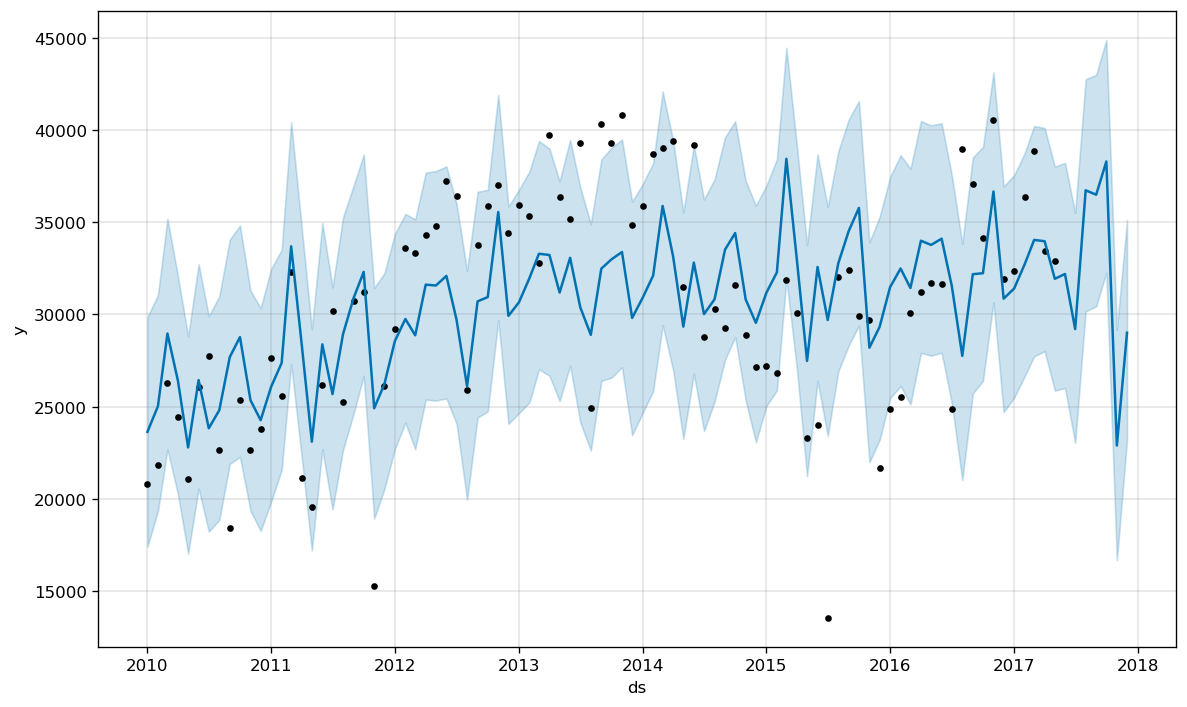

In [86]:
m.plot(forecast)

In [88]:
test.head()

,Periode,Toyota
0,2010-01-01,20803.0
1,2010-02-01,21800.0
2,2010-03-01,26287.0
3,2010-04-01,24422.0
4,2010-05-01,21050.0


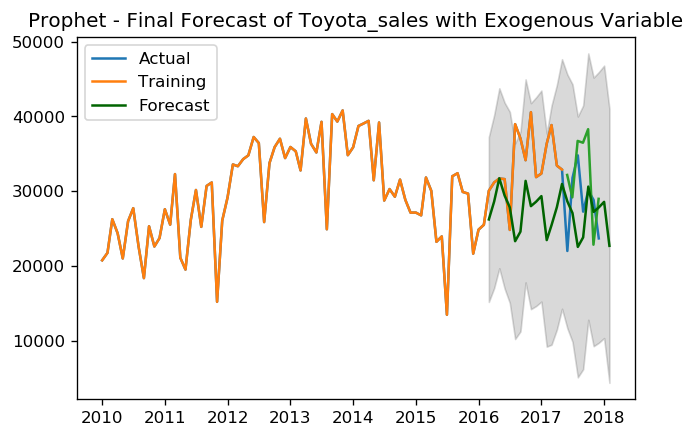

In [89]:
plt.plot(test['Periode'],test['Toyota'], label = 'Actual')
plt.plot(train_df['ds'],train_df['y'], label ='Training')
plt.plot(forecast['ds'].iloc[-7:],forecast['yhat'].iloc[-7:])
plt.plot(fitted_series, color='darkgreen', label ='Forecast')

plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prophet - Final Forecast of Toyota_sales with Exogenous Variable")
plt.show()

## training final model toyota

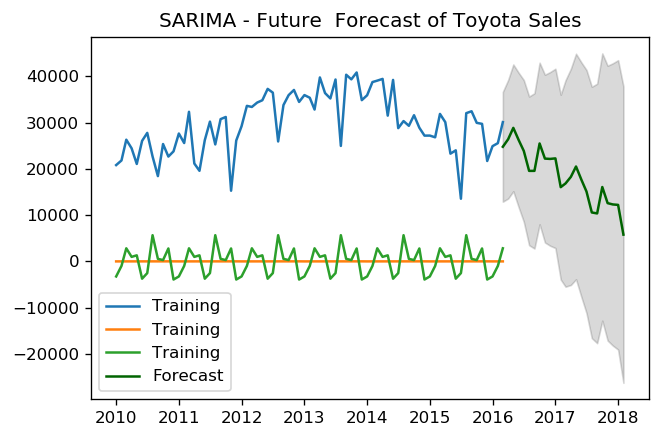

In [90]:
training=dftoyota
n_periode=12

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(train, label ='Training')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Future  Forecast of Toyota Sales")
plt.show()

(array([736055., 736146., 736238., 736330., 736420., 736511., 736603.,
        736695.]), <a list of 8 Text xticklabel objects>)

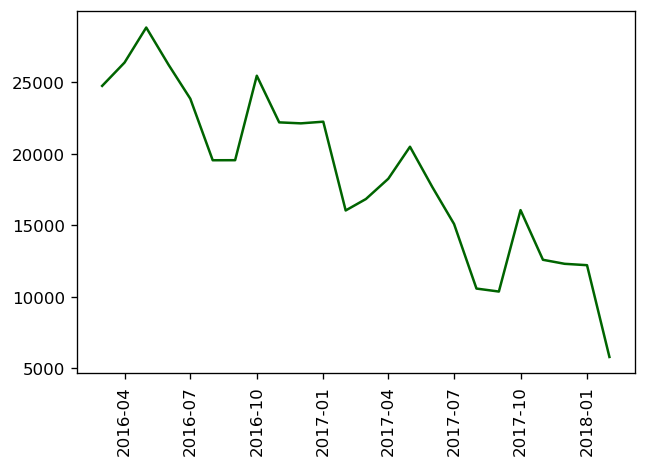

In [91]:
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.xticks(rotation=90)

In [92]:
toyota_predict=pd.DataFrame(fitted_series)
toyota_predict.columns=['Toyota']

In [93]:
toyota_predict

,Toyota
2016-03-01,24757.254310
2016-04-01,26390.649614
2016-05-01,28842.018235
2016-06-01,26225.990403
2016-07-01,23858.384288
2016-08-01,19551.870124
2016-09-01,19555.268651
2016-10-01,25468.590366
2016-11-01,22203.738563
2016-12-01,22134.517616


In [94]:
toyota_predict.to_csv('toyota_predict.csv')